# Clasificación de Spams
(based on https://github.com/milindsoorya/Spam-Classifier-in-python/blob/main/Introduction%20to%20Spam%20Classification.ipynb)


### Importar librerías

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import sklearn
import pickle
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold,cross_val_score,learning_curve

### Importar dataset

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/germanbraun/cursoKG/refs/heads/main/aa-lab/datasets/spam.csv',sep=",", encoding="latin1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Remover columnas no requeridas

In [5]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v2" : "text", "v1":"label"})

In [6]:
data[1980:2000]

,label,text
1980,ham,"Sorry, I'll call later"
1981,ham,"Sorry, I'll call later in meeting any thing re..."
1982,ham,Hey i will be late... i'm at amk. Need to drin...
1983,ham,I wnt to buy a BMW car urgently..its vry urgen...
1984,spam,Urgent! Please call 09061743810 from landline....
1985,ham,The length is e same but e top shorter n i got...
1986,ham,S..antha num corrct dane
1987,ham,No calls..messages..missed calls
1988,ham,"Sorry, I'll call later"
1989,ham,The basket's gettin full so I might be by tonight


### Contar entras por label

In [7]:
data['label'].value_counts()

,count
label,
ham,4825
spam,747


### Nube de palabras para analizar dataset

In [8]:
# Import nltk packages and Punkt Tokenizer Models
import nltk
nltk.download("punkt")
nltk.download('punkt_tab')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [9]:
ham_words = ''
spam_words = ''

In [10]:
# Creating a corpus of spam messages
for val in data[data['label'] == 'spam'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '

# Creating a corpus of ham messages
for val in data[data['label'] == 'ham'].text:
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

In [11]:
spam_wordcloud = WordCloud(width=500, height=300).generate(spam_words)
ham_wordcloud = WordCloud(width=500, height=300).generate(ham_words)

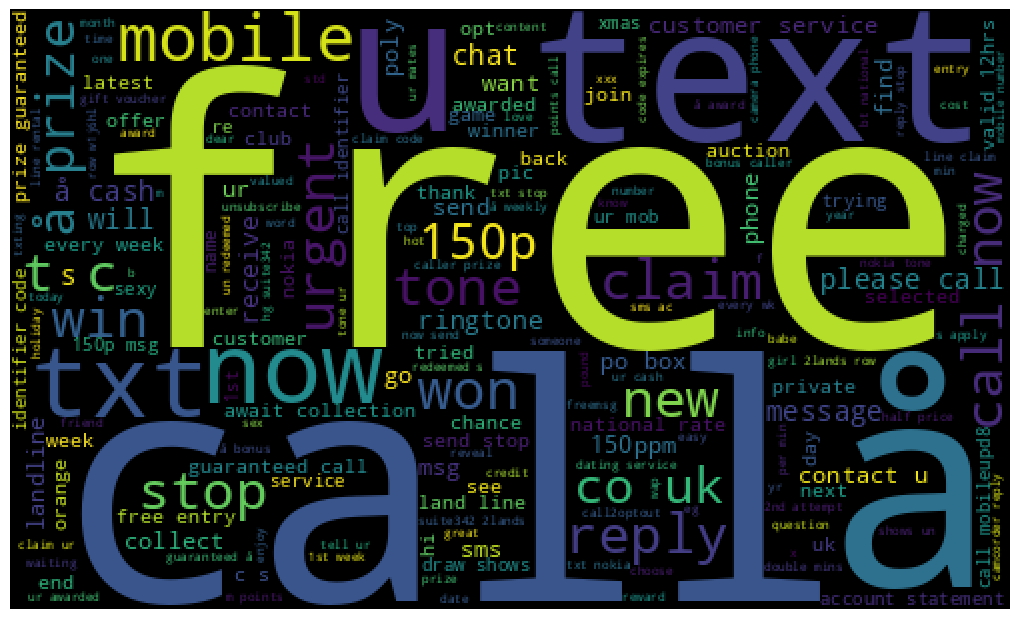

In [12]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

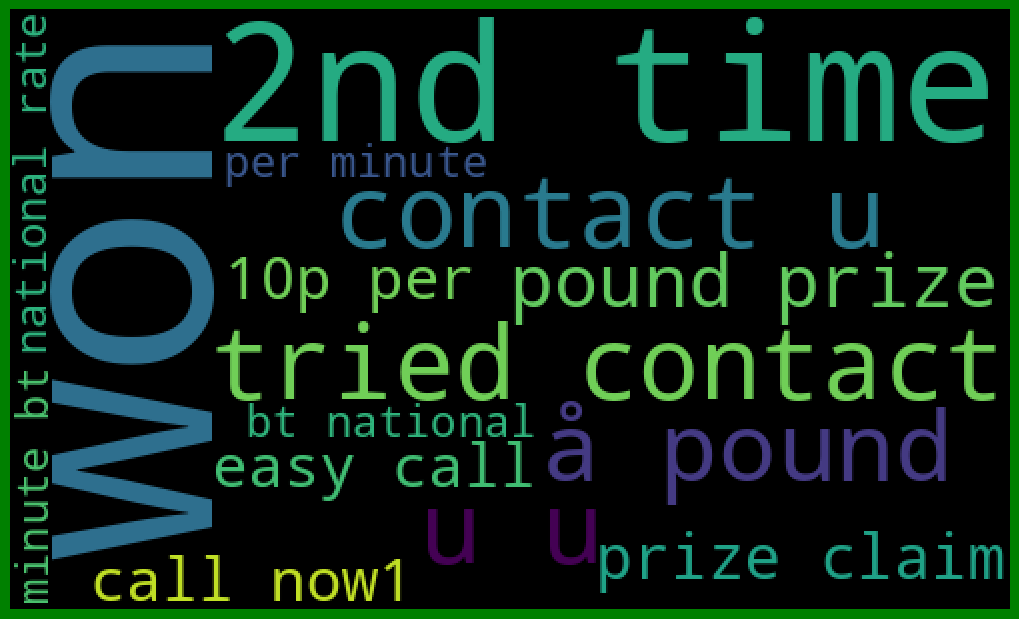

In [13]:
#Creating Ham wordcloud
plt.figure( figsize=(10,8), facecolor='g')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [14]:
data = data.replace(['ham','spam'],[0, 1])

In [41]:
data.head(20)

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


## Remover Stopwords de los mensajes

In [52]:
# nltk es una libraría Python para NLP (procesamiento lenguaje natural)
# https://www.nltk.org/
import nltk
nltk.download('stopwords')

print('Stopwords:', stopwords.words('english'))

#remove the punctuations and stopwords
import string
def text_process(text):

    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]

    return " ".join(text)

data['text'] = data['text'].apply(text_process)

print('Entrada del dataset luego de remover stopwords: ', data['text'][8])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stopwords: ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "sh

In [73]:
data.head(20)

,label,text
0,0,Go jurong point crazy Available bugis n great ...
1,0,Ok lar Joking wif u oni
2,1,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say early hor U c already say
4,0,Nah dont think goes usf lives around though
5,1,FreeMsg Hey darling 3 weeks word back Id like ...
6,0,Even brother like speak treat like aids patent
7,0,per request Melle Melle Oru Minnaminunginte Nu...
8,1,WINNER valued network customer selected receiv...
9,1,mobile 11 months U R entitled Update latest co...


In [54]:
text = pd.DataFrame(data['text'])
label = pd.DataFrame(data['label'])
label

,label
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


### Convertir palabras a vectores usando vectorizer

In [56]:
## Contar cuantas palabras aparecen en el dataset

from collections import Counter

total_counts = Counter()
for i in range(len(text)):
    for word in text.values[i][0].split(" "):
        total_counts[word] += 1

print("Total words in data set: ", len(total_counts))

# Ordenarlas en forma decreciente (Palabras con frecuencia más alta aparecen primero)
vocab = sorted(total_counts, key=total_counts.get, reverse=True)
print(vocab[:60])

Total words in data set:  11305
['u', '2', 'call', 'U', 'get', 'Im', 'ur', '4', 'ltgt', 'know', 'go', 'like', 'dont', 'come', 'got', 'time', 'day', 'want', 'Ill', 'lor', 'Call', 'home', 'send', 'going', 'one', 'need', 'Ok', 'good', 'love', 'back', 'n', 'still', 'text', 'im', 'later', 'see', 'da', 'ok', 'think', 'Ì', 'free', 'FREE', 'r', 'today', 'Sorry', 'week', 'phone', 'mobile', 'cant', 'tell', 'take', 'much', 'night', 'way', 'Hey', 'reply', 'work', 'make', 'give', 'new']


In [59]:
# Mapeo de palabras a índices
# 'u': 0, '2': 1 ...

vocab_size = len(vocab)
word2idx = {}
#print vocab_size
for i, word in enumerate(vocab):
    word2idx[word] = i

print("word2idx", word2idx)

word2idx {'u': 0, '2': 1, 'call': 2, 'U': 3, 'get': 4, 'Im': 5, 'ur': 6, '4': 7, 'ltgt': 8, 'know': 9, 'go': 10, 'like': 11, 'dont': 12, 'come': 13, 'got': 14, 'time': 15, 'day': 16, 'want': 17, 'Ill': 18, 'lor': 19, 'Call': 20, 'home': 21, 'send': 22, 'going': 23, 'one': 24, 'need': 25, 'Ok': 26, 'good': 27, 'love': 28, 'back': 29, 'n': 30, 'still': 31, 'text': 32, 'im': 33, 'later': 34, 'see': 35, 'da': 36, 'ok': 37, 'think': 38, 'Ì': 39, 'free': 40, 'FREE': 41, 'r': 42, 'today': 43, 'Sorry': 44, 'week': 45, 'phone': 46, 'mobile': 47, 'cant': 48, 'tell': 49, 'take': 50, 'much': 51, 'night': 52, 'way': 53, 'Hey': 54, 'reply': 55, 'work': 56, 'make': 57, 'give': 58, 'new': 59, 'number': 60, 'already': 61, 'great': 62, 'right': 63, 'ask': 64, 'Hi': 65, 'say': 66, 'tomorrow': 67, '1': 68, 'amp': 69, 'well': 70, 'claim': 71, 'said': 72, 'txt': 73, 'Oh': 74, 'Good': 75, 'message': 76, 'didnt': 77, 'Txt': 78, 'e': 79, 'prize': 80, 'meet': 81, 'really': 82, 'stop': 83, 'ill': 84, 'wat': 85, 

In [77]:
# Texto a Vector
#
def text_to_vector(text):
    word_vector = np.zeros(vocab_size)
    for word in text.split(" "):
        if word2idx.get(word) is None:
            continue
        else:
            word_vector[word2idx.get(word)] += 1
    return np.array(word_vector)

# Convertir todos los títulos a vectores
# Aplicamos función anterior para todas las inputs
word_vectors = np.zeros((len(text), len(vocab)), dtype=np.int_)
for i, (_, text_) in enumerate(text.iterrows()):
    word_vectors[i] = text_to_vector(text_[0])


print("un vector ejemplo entrada 1 (u)", word_vectors[1])
print("un vector ejemplo entrada 2 (2)", word_vectors[2])

#forma de los vectores (5572 entradas y 11305 palabras)
word_vectors.shape

un vector ejemplo entrada 1 (u) [1 0 0 ... 0 0 0]
un vector ejemplo entrada 2 (2) [0 1 0 ... 0 0 0]


(5572, 11305)

In [81]:
#Texto a vectores pero haciendo extracción de características
#https://scikit-learn.org/stable/api/sklearn.feature_extraction.html
#Usando TfidfVectorizer mide la importancia de una palabra en un texto y resalta las menos comunes
#Dimensión del vector puede ser menor ya que la importancia de algunas palabras es 0 (por ej si aparecen en todas las entradas)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data['text'])

print("un vector ejemplo entrada 1 (u)", word_vectors[1])
print("un vector ejemplo entrada 2 (2)", word_vectors[2])

vectors.shape

un vector ejemplo entrada 1 (u) [1 0 0 ... 0 0 0]
un vector ejemplo entrada 2 (2) [0 1 0 ... 0 0 0]


(5572, 9376)

In [82]:
features = vectors

### Dividir el dataset en entrenamiento y testing

In [84]:
#split the dataset into train and test set
#con random_state aseguramos reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(features, data['label'], test_size=0.15, random_state=111)

### Usar clasificadores

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [87]:
#initialize multiple classification models

#Parámetros kernel y gamma son usados para clasificación cuando datos no son linealmente separables
svc = SVC(kernel='sigmoid', gamma=1.0)

#Parámetro liblinear es un solver para el problema de optimización (encontrar los coeficientes de la regresión) y
#penalty para regularización: penaliza características irrelevantes (pesos a 0)
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [110]:
# antes de entrenar, importamos otras librarías para interpretar el resultado
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [113]:
#Entrenar el predecir con máquina de soporte vectorial
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc_score = accuracy_score(y_test , y_pred)
print("SVC accuracy score", svc_score)

SVC accuracy score 0.9784688995215312


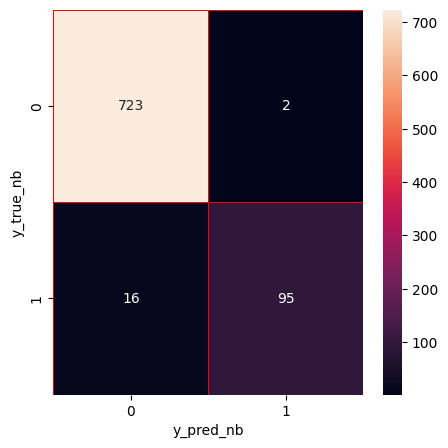

In [112]:
# Matriz de confunsión para SVC
cm = confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_nb")
plt.ylabel("y_true_nb")
plt.show()

In [116]:
#Entrenar y predecir con regresión logística
lrc.fit(X_train, y_train)
y_pred = lrc.predict(X_test)
lrc_score = accuracy_score(y_test , y_pred)
print("RLC accuracy score", lrc_score)

RLC accuracy score 0.9533492822966507


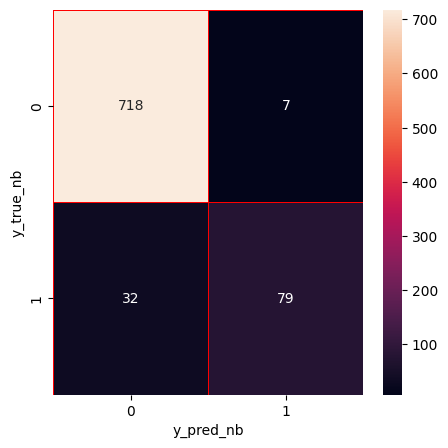

In [117]:
#Matriz de confusión para LRC
# Matriz de confunsión para SVC
cmlrc = confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmlrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_nb")
plt.ylabel("y_true_nb")
plt.show()